In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
# source: http://opendatalab.de/projects/geojson-utilities/
gdf = gpd.read_file("Data\landkreise_simplify200.geojson")

In [3]:
gdf.loc[:,"stat_bnd_amt_id"] = gdf["AGS"].apply(lambda x: x[:5])

In [4]:
# remove some columns and reduce to actual nuts3
gdf.columns
gdf.drop(columns=['IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1','SN_V2', 'SN_G', 'FK_S3','ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS',"RS_0","AGS_0"], inplace=True)
gdf.index = gdf["stat_bnd_amt_id"]
gdf = gdf.loc[gdf.index.drop_duplicates(),:]

# expand dict stored in "destatis" column containing population information
geo_df = pd.concat([gdf.drop(columns="destatis"), gdf["destatis"].apply(pd.Series)],axis=1)
geo_df = geo_df.loc[~geo_df.index.duplicated(),:]
# there are 401 nuts3 regions
len(gdf),len(geo_df)
assert len(geo_df)==401

In [5]:
geo_df[geo_df['stat_bnd_amt_id']=='08235']

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w
stat_bnd_amt_id,,,,,,,,,,
08235,Calw,Landkreis,DE12A,2009-01-01,DEBKGDL20000E449,"POLYGON ((8.39364 48.83395, 8.41152 48.83013, ...",08235,158397,79514,78883


In [6]:
geo_df.head()

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w
stat_bnd_amt_id,,,,,,,,,,
01001,Flensburg,Kreisfreie Stadt,DEF01,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.41266 54.82264, 9.42293 54.82322, ...",01001,89504,44599,44905
01002,Kiel,Kreisfreie Stadt,DEF02,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16916 54.43138, 10.18877 54.41108...",01002,247548,120566,126982
01003,Lübeck,Kreisfreie Stadt,DEF03,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87684 53.98737, 10.88454 53.97820...",01003,217198,104371,112827
01004,Neumünster,Kreisfreie Stadt,DEF04,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.99545 54.14972, 10.00821 54.14217,...",01004,79487,39241,40246
01051,Dithmarschen,Kreis,DEF05,2011-08-01,DEBKGDL20000E14G,"MULTIPOLYGON (((9.07402 54.36277, 9.08209 54.3...",01051,133210,65720,67490


In [7]:
gdf["BEZ"].unique()

array(['Kreisfreie Stadt', 'Kreis', 'Landkreis', 'Stadtkreis'],
      dtype=object)

In [8]:
entgeld_df = pd.read_excel("Data\entgelt-d-0-201712-xlsm.xlsm",sheet_name="16.2",)

In [9]:
#  this contains the proper column names
entgeld_df.loc[5:8,:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Beschäftigungsstatistik
5,Region,NaN,Median der erzielten Entgelte (in €),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Insgesamt (Arbeitsort),davon:,NaN,darunter:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insgesamt (Wohnort)
7,NaN,NaN,NaN,Männer,Frauen,Deutsche,Ausländer,15 bis unter \n25 Jahre,25 bis unter \n55 Jahre,55 bis unter \n65 Jahre,ohne Berufs-abschluss,anerkannter\nBerufsabschluss,akademischer\nBerufsabscluss,NaN
8,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12


In [10]:
cols = ["Region", "ID", entgeld_df.iloc[6,2], *entgeld_df.iloc[7,3:13].to_list(), entgeld_df["Beschäftigungsstatistik"][6]]
#entgeld_df.columns = cols

In [11]:
df = pd.DataFrame(entgeld_df.iloc[10:-5,:].values, columns=cols) #FK - was 10:-1 before
df.loc[:,"ID"]=df["ID"].astype(int).apply(lambda x: f"{x:05}")
df.set_index("ID", inplace=True)
df.head()

,Region,Insgesamt (Arbeitsort),Männer,Frauen,Deutsche,Ausländer,15 bis unter \n25 Jahre,25 bis unter \n55 Jahre,55 bis unter \n65 Jahre,ohne Berufs-abschluss,anerkannter\nBerufsabschluss,akademischer\nBerufsabscluss,Insgesamt (Wohnort)
ID,,,,,,,,,,,,,
01001,"Flensburg, Stadt",2986.055556,3167.028926,2678.237226,3083.474138,1677.488636,1993.5,2992.490291,3372.760274,1934.875,3015.884615,4468.147059,2758.948276
01002,"Kiel, Landeshauptstadt",3303.962273,3465.306678,3108.004873,3336.632812,2401.141026,2218.510753,3295.898593,3693.397727,2383.108696,3178.778146,4925.837838,3148.856511
01003,"Lübeck, Hansestadt",3035.921109,3121.775605,2881.505587,3105.191211,2008.758929,2115.717391,3055.292561,3323.544693,2154.477273,3012.222798,4793.809859,3022.366925
01004,"Neumünster, Stadt",2841.743194,2896.099022,2674.631944,2873.796501,2235.115385,2173.755814,2872.1133,3012.184783,2323.5,2867.481132,4859.590909,2800.877644
01051,Dithmarschen,2913.626492,3068.581181,2440.717391,2955.242547,1952.473684,2221.333333,2923.9375,3247.6875,2237.596774,2940.836134,5218,2971.936526


In [12]:
# add monthly wages to geo_df
#geo_df.loc[df.index,["brutto_mon_arbeitsort","brutto_mon_wohnort"]] = df.loc[:,["Insgesamt (Arbeitsort)","Insgesamt (Wohnort)"]].astype(float).values
geo_df.loc[df.index,"brutto_mon_arbeitsort"] = df["Insgesamt (Arbeitsort)"].astype(float).values
geo_df.loc[df.index,"brutto_mon_wohnort"] = df["Insgesamt (Wohnort)"].astype(float).values
geo_df.head()

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w,brutto_mon_arbeitsort,brutto_mon_wohnort
stat_bnd_amt_id,,,,,,,,,,,,
01001,Flensburg,Kreisfreie Stadt,DEF01,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.41266 54.82264, 9.42293 54.82322, ...",01001,89504,44599,44905,2986.055556,2758.948276
01002,Kiel,Kreisfreie Stadt,DEF02,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16916 54.43138, 10.18877 54.41108...",01002,247548,120566,126982,3303.962273,3148.856511
01003,Lübeck,Kreisfreie Stadt,DEF03,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87684 53.98737, 10.88454 53.97820...",01003,217198,104371,112827,3035.921109,3022.366925
01004,Neumünster,Kreisfreie Stadt,DEF04,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.99545 54.14972, 10.00821 54.14217,...",01004,79487,39241,40246,2841.743194,2800.877644
01051,Dithmarschen,Kreis,DEF05,2011-08-01,DEBKGDL20000E14G,"MULTIPOLYGON (((9.07402 54.36277, 9.08209 54.3...",01051,133210,65720,67490,2913.626492,2971.936526


In [13]:
demand_df = pd.read_json("Data/opendata_ffe_demandregio_spatial_lk401.json")

In [14]:
sum(demand_df["id_region"].astype(str).str[-3:] == "000")
# all end with 000

401

In [15]:
id_index = demand_df["id_region"].apply(lambda x: f"{x:08}"[:-3])
demand_df.index = id_index
demand_df.head()

,id_spatial,id_region_type,id_region,year,internal_id,value
id_region,,,,,,
01001,4,4,1001000,2017,NaN,137067.442378
01002,4,4,1002000,2017,NaN,383927.889667
01003,4,4,1003000,2017,NaN,334958.088097
01004,4,4,1004000,2017,NaN,122846.457156
01051,4,4,1051000,2017,NaN,206636.303878


In [16]:
geo_df.loc[demand_df.index,"demand [MWh/a_2017]"] = demand_df["value"]

In [17]:
# test if any row is empty
assert geo_df["demand [MWh/a_2017]"].isna().sum() == 0
assert geo_df.loc[:,["brutto_mon_arbeitsort","brutto_mon_wohnort"]].isna().sum().sum() == 0

In [18]:
geo_df.head()

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w,brutto_mon_arbeitsort,brutto_mon_wohnort,demand [MWh/a_2017]
stat_bnd_amt_id,,,,,,,,,,,,,
01001,Flensburg,Kreisfreie Stadt,DEF01,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.41266 54.82264, 9.42293 54.82322, ...",01001,89504,44599,44905,2986.055556,2758.948276,137067.442378
01002,Kiel,Kreisfreie Stadt,DEF02,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16916 54.43138, 10.18877 54.41108...",01002,247548,120566,126982,3303.962273,3148.856511,383927.889667
01003,Lübeck,Kreisfreie Stadt,DEF03,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87684 53.98737, 10.88454 53.97820...",01003,217198,104371,112827,3035.921109,3022.366925,334958.088097
01004,Neumünster,Kreisfreie Stadt,DEF04,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.99545 54.14972, 10.00821 54.14217,...",01004,79487,39241,40246,2841.743194,2800.877644,122846.457156
01051,Dithmarschen,Kreis,DEF05,2011-08-01,DEBKGDL20000E14G,"MULTIPOLYGON (((9.07402 54.36277, 9.08209 54.3...",01051,133210,65720,67490,2913.626492,2971.936526,206636.303878


In [19]:
# #  get hours worked
# work_hours_df = pd.read_excel("data/ETR_R2B2_2018_j.xlsx", sheet_name="Tab 3.19")
# # get columnnames
# colnames = work_hours_df.iloc[0,:]
# cols_2_drop = pd.isna(colnames)

# # reduce to nuts3 rows and data which starts at row 5
# work_hours_df = work_hours_df.loc[~pd.isna(work_hours_df.iloc[:,6]),:].iloc[1:,:]
# work_hours_df = work_hours_df.drop(columns=work_hours_df.columns[cols_2_drop])

# work_hours_df.columns = ["RegionalSchlüssel","nuts3","Bundesland", "nuts-lvl","Stadt/Land/-kreis", "Geleistete Arbeitsstunden","davon"]
# work_hours_df.drop(columns=["nuts-lvl","davon"],inplace=True)
# cities = work_hours_df["RegionalSchlüssel"].apply(len) < 5
# # correct id from 02, 11 to 02000, 11000
# work_hours_df.loc[cities,"RegionalSchlüssel"] = work_hours_df["RegionalSchlüssel"][cities].apply(lambda x: f"{int(x)*1000:05}")

In [20]:
work_hours_df = pd.read_excel("Data/ETR_R2B2_2018_j.xlsx", sheet_name="Tab 1.3")
colnames = work_hours_df.iloc[0,:]
cols_2_drop = pd.isna(colnames)
work_hours_df = work_hours_df.loc[~pd.isna(work_hours_df.iloc[:,6]),:].iloc[1:,:]
work_hours_df = work_hours_df.drop(columns=work_hours_df.columns[cols_2_drop])
work_hours_df.columns = ["RegionalSchlüssel","nuts3","Bundesland", "nuts-lvl","Stadt/Land/-kreis", *colnames[8:] ]

# correct id from 02, 11 to 02000, 11000
cities = work_hours_df["RegionalSchlüssel"].apply(len) < 5
work_hours_df.loc[cities,"RegionalSchlüssel"] = work_hours_df["RegionalSchlüssel"][cities].apply(lambda x: f"{int(x)*1000:05}")

In [21]:
work_hours_df

,RegionalSchlüssel,nuts3,Bundesland,nuts-lvl,Stadt/Land/-kreis,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,08111,DE111,BW,NaN,"Stuttgart, Stadtkreis",1475,1476,1475,1474,1471,...,1424,1441,1449,1436,1432,1432,1429,1421,1419,1425
9,08115,DE112,BW,NaN,"Böblingen, Landkreis",1459,1454,1448,1442,1440,...,1377,1408,1426,1408,1406,1404,1405,1398,1397,1402
10,08116,DE113,BW,NaN,"Esslingen, Landkreis",1443,1438,1437,1432,1432,...,1387,1416,1414,1395,1397,1399,1397,1390,1392,1399
11,08117,DE114,BW,NaN,"Göppingen, Landkreis",1437,1429,1422,1419,1419,...,1374,1404,1410,1393,1394,1399,1398,1390,1389,1395
12,08118,DE115,BW,NaN,"Ludwigsburg, Landkreis",1443,1436,1429,1427,1425,...,1385,1411,1419,1405,1405,1404,1406,1401,1397,1404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,16073,DEG0I,TH,NaN,"Saalfeld-Rudolstadt, Landkreis",1596,1581,1562,1558,1567,...,1504,1533,1530,1503,1483,1481,1486,1471,1462,1446
513,16074,DEG0J,TH,NaN,Saale-Holzland-Kreis,1593,1579,1550,1541,1547,...,1480,1516,1542,1514,1498,1500,1505,1488,1481,1466
514,16075,DEG0K,TH,NaN,Saale-Orla-Kreis,1595,1570,1561,1562,1568,...,1497,1531,1540,1516,1499,1502,1507,1492,1484,1466
515,16076,DEG0L,TH,NaN,"Greiz, Landkreis",1614,1594,1579,1577,1588,...,1518,1544,1547,1518,1503,1503,1505,1488,1476,1462


In [22]:
geo_df.loc[work_hours_df["RegionalSchlüssel"],"Arbeitsstunden pro Arbeiter"] = work_hours_df[2017].values
geo_df["wohnort stundenlohn"] = geo_df["brutto_mon_wohnort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)
geo_df["arbeitsort stundenlohn"] =  geo_df["brutto_mon_arbeitsort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)

Text(0.5, 1.0, 'Bruttolohn(Median) im Wohnort [€/h]')

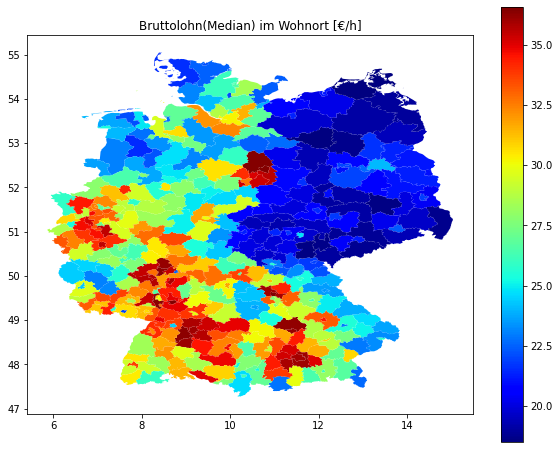

In [23]:

vmin = min(geo_df["wohnort stundenlohn"])
vmax = max(geo_df["wohnort stundenlohn"])
fig, ax = plt.subplots(figsize=(10,8))
geo_df.plot(ax=ax,column="wohnort stundenlohn", cmap="jet")
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
ax.set_title("Bruttolohn(Median) im Wohnort [€/h]")
#fig.savefig("Data\plots\gross_hourly_wages.png")

In [24]:
# get number of employed people
workers_df = pd.read_excel("data/ETR_R2B2_2018_j.xlsx", sheet_name="Tab 1.1")
colnames = workers_df.iloc[0,:]
cols_2_drop = pd.isna(colnames)
workers_df = workers_df.loc[~pd.isna(workers_df.iloc[:,6]),:].iloc[1:,:]
workers_df = workers_df.drop(columns=workers_df.columns[cols_2_drop])
workers_df.columns = ["RegionalSchlüssel","nuts3","Bundesland", "nuts-lvl","Stadt/Land/-kreis", *colnames[8:] ]

# correct id from 02, 11 to 02000, 11000
cities = workers_df["RegionalSchlüssel"].apply(len) < 5
workers_df.loc[cities,"RegionalSchlüssel"] = workers_df["RegionalSchlüssel"][cities].apply(lambda x: f"{int(x)*1000:05}")

In [25]:
geo_df.loc[workers_df["RegionalSchlüssel"],"Erwerbstätige"] = workers_df[2017].values*1000

In [26]:
#The salary for Berlin should be ~24€ (23.68 in 2019) according to the Bundesland-level statistics so the hourly wages are too high
geo_df[geo_df['GEN']=="Berlin"]

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w,brutto_mon_arbeitsort,brutto_mon_wohnort,demand [MWh/a_2017],Arbeitsstunden pro Arbeiter,wohnort stundenlohn,arbeitsort stundenlohn,Erwerbstätige
stat_bnd_amt_id,,,,,,,,,,,,,,,,,
11000,Berlin,Kreisfreie Stadt,DE300,1990-10-03,DEBKGDL20000E0P4,"POLYGON ((13.47551 52.66878, 13.47565 52.66628...",11000,3644826,1792801,1852025,3125.591996,3100.15837,5.595324e+06,1417,26.253988,26.469375,1960186.0


In [27]:
geo_df.loc["01001",:]

GEN                                                                    Flensburg
BEZ                                                             Kreisfreie Stadt
NUTS                                                                       DEF01
WSK                                                                   2008-01-01
DEBKG_ID                                                        DEBKGDL20000002R
geometry                       POLYGON ((9.412664108896104 54.8226409083269, ...
stat_bnd_amt_id                                                            01001
population                                                                 89504
population_m                                                               44599
population_w                                                               44905
brutto_mon_arbeitsort                                                2986.055556
brutto_mon_wohnort                                                   2758.948276
demand [MWh/a_2017]         

In [28]:
import pandas as pd
wage_df = pd.read_csv(r"Data\wages_and_taxes.csv", header=5, sep=";", encoding="cp1252", na_values=["-","."])[:-4]

new_cols = ["year", "bnd_id","name"]
new_cols.extend(wage_df.columns[3:])
wage_df.columns = new_cols

In [29]:
wage_df

,year,bnd_id,name,Lohn- und Einkommensteuerpflichtige[Anzahl],Gesamtbetrag der Einkünfte[Tsd. EUR],Lohn- und Einkommensteuer[Tsd. EUR]
0,2016,DG,Deutschland,40924126.0,1.617673e+09,286966239.0
1,2016,01,Schleswig-Holstein,1417318.0,5.497582e+07,9383471.0
2,2016,01001,"Flensburg, Kreisfreie Stadt",43888.0,1.386544e+06,227938.0
3,2016,01002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",122746.0,4.047835e+06,667048.0
4,2016,01003,"Lübeck, Hansestadt, Kreisfreie Stadt",106460.0,3.578008e+06,591419.0
...,...,...,...,...,...,...
533,2016,16073,"Saalfeld-Rudolstadt, Kreis",49152.0,1.483222e+06,204979.0
534,2016,16074,Saale-Holzland-Kreis,38535.0,1.241424e+06,176495.0
535,2016,16075,Saale-Orla-Kreis,38468.0,1.121061e+06,145578.0
536,2016,16076,"Greiz, Kreis",45749.0,1.389538e+06,182931.0


In [30]:
wage_df.loc[:,"tax_percentage"] = wage_df["Lohn- und Einkommensteuer[Tsd. EUR]"]/wage_df["Gesamtbetrag der Einkünfte[Tsd. EUR]"]
# stimmt ganz gut überein mit der Steuerbelastung aus https://www.destatis.de/DE/Themen/Staat/Steuern/Lohnsteuer-Einkommensteuer/_inhalt.html#sprg236420

# hamburg and berlin
big_cities = (wage_df["bnd_id"] == "02") | (wage_df["bnd_id"] == "11")
wage_df.loc[big_cities,"bnd_id"] = wage_df["bnd_id"][big_cities].apply(lambda x: f"{int(x)*1000:05}")

In [31]:
wage_df_nuts3 = wage_df.loc[wage_df["bnd_id"].apply(len) == 5,:]
# wage_df_nuts3.reset_index(drop=True) geo_df.stat_bnd_amt_id
wage_df_nuts3 = wage_df_nuts3.set_index("bnd_id")

In [32]:
wage_df_nuts3 = wage_df_nuts3.loc[geo_df.stat_bnd_amt_id,:]
wage_df_nuts3.isna().sum()

year                                           0
name                                           0
Lohn- und Einkommensteuerpflichtige[Anzahl]    0
Gesamtbetrag der Einkünfte[Tsd. EUR]           0
Lohn- und Einkommensteuer[Tsd. EUR]            0
tax_percentage                                 0
dtype: int64

In [33]:
wage_df_nuts3.describe()
# berlham["bnd_id"].apply(lambda x: f"{int(x)*1000:05}")

,Lohn- und Einkommensteuerpflichtige[Anzahl],Gesamtbetrag der Einkünfte[Tsd. EUR],Lohn- und Einkommensteuer[Tsd. EUR],tax_percentage
count,4.010000e+02,4.010000e+02,4.010000e+02,401.000000
mean,1.020552e+05,4.034098e+06,7.156265e+05,0.167413
std,1.231102e+05,5.043692e+06,1.020943e+06,0.020025
min,1.636000e+04,5.453040e+05,8.056000e+04,0.127426
25%,5.049200e+04,1.816734e+06,2.925410e+05,0.152874
50%,7.472700e+04,2.983157e+06,4.829990e+05,0.165902
75%,1.165400e+05,4.458471e+06,7.797970e+05,0.179126
max,1.775080e+06,6.230263e+07,1.130164e+07,0.256187


<AxesSubplot:ylabel='Frequency'>

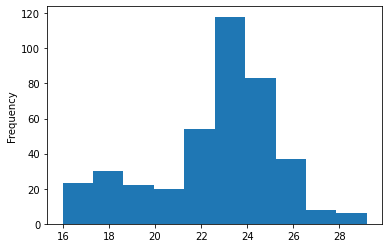

In [34]:
geo_df.loc[wage_df_nuts3.index,"netto_mon_wohnort"] = geo_df.loc[wage_df_nuts3.index,"brutto_mon_wohnort"] * (1-wage_df_nuts3["tax_percentage"])
nettolohn = geo_df["netto_mon_wohnort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)
geo_df["wohnort nettolohn [€/h]"] = nettolohn.astype(float)
geo_df["wohnort nettolohn [€/h]"].plot(kind="hist")

Text(0.5, 1.0, 'Median net salary [€/h]')

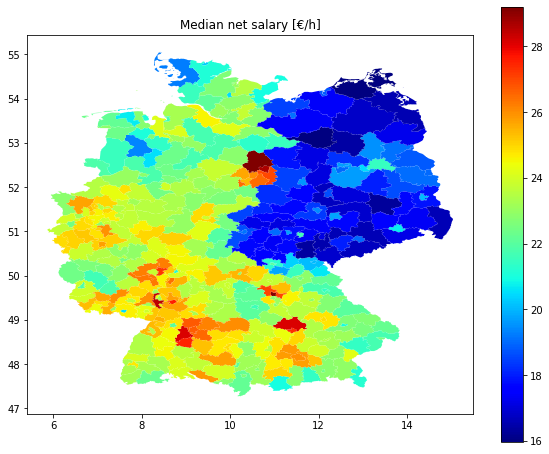

In [35]:

vmin = min(geo_df["wohnort nettolohn [€/h]"])
vmax = max(geo_df["wohnort nettolohn [€/h]"])
fig, ax = plt.subplots(figsize=(10,8))
geo_df.plot(ax=ax,column="wohnort nettolohn [€/h]", cmap="jet")
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
ax.set_title("Median net salary [€/h]")
#fig.savefig("Data\plots\net_hourly_wages.png")

In [36]:
# calculate Value of Lost Load
voll = ((4745-geo_df["Arbeitsstunden pro Arbeiter"])*geo_df["wohnort nettolohn [€/h]"]*0.5*(geo_df["Erwerbstätige"]+0.5*(geo_df["population"] - geo_df["Erwerbstätige"])))/(geo_df['demand [MWh/a_2017]']*1000)
geo_df["voll"] = voll.astype(float)
geo_df["voll"].describe()

count    401.000000
mean      18.763188
std        3.254970
min       12.078368
25%       17.440226
50%       18.877867
75%       20.352171
max       31.532236
Name: voll, dtype: float64

In [37]:
geo_df["voll"].max()

31.53223618803696

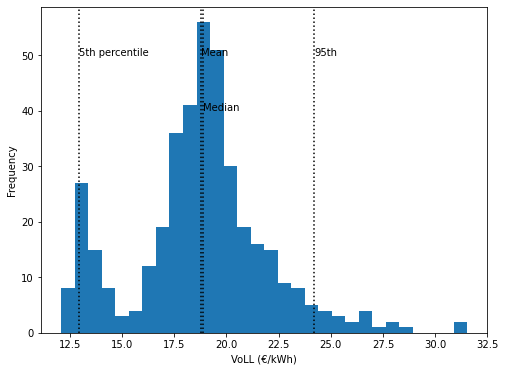

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
ax = geo_df["voll"].plot(kind="hist", bins=30)#, alpha = 0.65
ax.set_xlabel("VoLL (€/kWh)")

mean = geo_df["voll"].mean()
median = geo_df["voll"].median()
quant25 = geo_df["voll"].quantile(0.25)
quant75 = geo_df["voll"].quantile(0.75)
quant5 = geo_df["voll"].quantile(0.05)
quant95 = geo_df["voll"].quantile(0.95)
slices = [mean, median, quant5, quant95]
for i in slices:
    ax.axvline(i, linestyle = ":", color="black")

ax.text(mean, 50, "Mean", size=10) 
ax.text(median, 40, "Median", size=10) 
ax.text(quant5, 50, "5th percentile", size=10) 
ax.text(quant95, 50, "95th", size=10)

plt.show()
# Werte deutlich höher als in den 3 Studien aus https://www.sciencedirect.com/science/article/pii/S2214629617301184

In [39]:
(geo_df['voll']*geo_df['population']).sum()/(geo_df['population'].sum())

19.25672087637426

In [40]:
geo_df.voll.describe()

count    401.000000
mean      18.763188
std        3.254970
min       12.078368
25%       17.440226
50%       18.877867
75%       20.352171
max       31.532236
Name: voll, dtype: float64

In [41]:
geo_df.sort_values(by='voll').tail(20)

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id,population,population_m,population_w,brutto_mon_arbeitsort,brutto_mon_wohnort,demand [MWh/a_2017],Arbeitsstunden pro Arbeiter,wohnort stundenlohn,arbeitsort stundenlohn,Erwerbstätige,netto_mon_wohnort,wohnort nettolohn [€/h],voll
stat_bnd_amt_id,,,,,,,,,,,,,,,,,,,,
08115,Böblingen,Landkreis,DE112,2014-04-01,DEBKGDL20000E096,"POLYGON ((8.93802 48.86639, 8.95807 48.85476, ...",08115,391640,194989,196651,4596.113497,4056.414567,6.031965e+05,1397,34.843933,39.479858,230020.0,3277.542624,28.153552,24.285821
08212,Karlsruhe,Stadtkreis,DE122,1975-02-14,DEBKGDL20000E22N,"POLYGON ((8.42888 49.09118, 8.43560 49.09153, ...",08212,313092,160429,152663,3681.723479,3691.214286,4.829917e+05,1397,31.706923,31.625399,239915.0,2976.216811,25.565212,24.499987
09162,München,Kreisfreie Stadt,DE212,2004-12-31,DEBKGDL20000E06K,"POLYGON ((11.54637 48.22836, 11.58133 48.22981...",09162,1471508,717308,754200,4168.697158,4005.184363,2.254607e+06,1422,33.799024,35.178879,1104722.0,3079.302891,25.985678,24.667107
05314,Bonn,Kreisfreie Stadt,DEA22,1969-08-01,DEBKGDL20000E68K,"POLYGON ((7.13221 50.77185, 7.15249 50.76004, ...",05314,327258,156328,170930,3857.376026,3711.785166,5.040057e+05,1374,32.417338,33.688874,247944.0,2952.653666,25.787368,24.802229
05111,Düsseldorf,Kreisfreie Stadt,DEA11,1980-01-01,DEBKGDL20000E3B7,"POLYGON ((6.75294 51.34988, 6.78082 51.34257, ...",05111,619294,299315,319979,3882.140137,3778.947752,9.558286e+05,1415,32.047613,32.922743,534147.0,2925.838240,24.812762,24.927271
07315,Mainz,Kreisfreie Stadt,DEB35,1969-06-07,DEBKGDL20000E1IM,"POLYGON ((8.24345 50.02796, 8.32234 49.97359, ...",07315,217118,105599,111519,3554.328125,3709.375000,3.330876e+05,1358,32.777982,31.407907,157135.0,2988.023439,26.403742,25.120458
09184,München,Landkreis,DE21H,2011-01-01,DEBKGDL20000E06M,"POLYGON ((11.58664 48.29128, 11.59269 48.28550...",09184,348871,173601,175270,4227.013114,4087.441252,5.364349e+05,1447,33.897232,35.054704,287904.0,3108.850930,25.781763,25.233193
09262,Passau,Kreisfreie Stadt,DE222,2016-01-01,DEBKGDL20000E58K,"POLYGON ((13.38642 48.60926, 13.39637 48.60820...",09262,52469,25344,27125,3264.846591,3045.812500,8.018040e+04,1343,27.215004,29.172121,53770.0,2520.059714,22.517287,25.375004
06412,Frankfurt am Main,Kreisfreie Stadt,DE712,1977-01-01,DEBKGDL20000DZ72,"POLYGON ((8.71138 50.22626, 8.71932 50.22531, ...",06412,753056,371671,381385,4182.182885,3861.365922,1.156505e+06,1435,32.290168,34.972958,703971.0,3006.265910,25.139506,26.208663


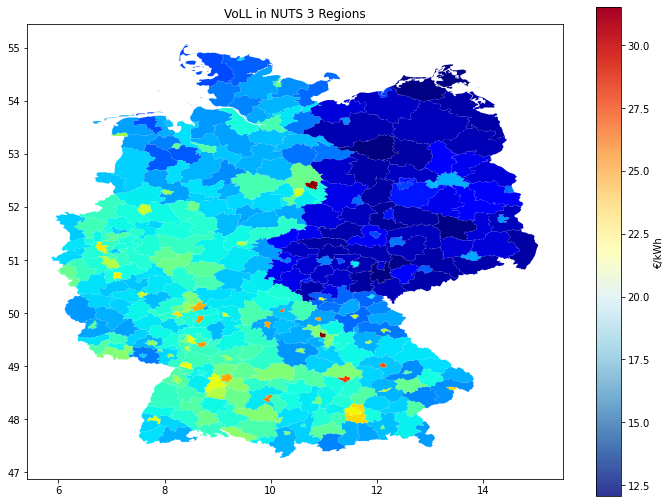

In [49]:
vmin = min(geo_df["voll"])
vmax = max(geo_df["voll"])
fig, ax = plt.subplots(figsize=(12,9))
geo_df.plot(ax=ax,column="voll", cmap='jet')
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm).set_label('€/kWh')
ax.set_title("VoLL in NUTS 3 Regions")
#ax.collections.colorbar.set_label("Eur/kWh")
fig.savefig(r"Data\plots\voll.png")

In [43]:
#geo_df.to_csv("Data/netto_voll_calculated.csv")

In [44]:
hourly_hh_demand_df = pd.read_csv(r"Data\load_profile\nuts3_hh_demand_profiles.csv")
id = hourly_hh_demand_df['Date']
hourly_hh_demand_df.drop(columns="Date",inplace=True)
hourly_hh_demand_df.head()

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
0,12.478052,34.951205,30.493197,11.183433,18.811313,27.639508,23.324297,28.275259,44.074298,18.162171,...,9.871333,9.010885,15.341186,11.577570,7.944910,15.135095,11.698659,11.488762,13.994268,12.778448
1,12.136028,33.993189,29.657375,10.876894,18.295693,26.881906,22.684976,27.500231,42.866217,17.664344,...,9.600759,8.763896,14.920682,11.260228,7.727139,14.720241,11.377997,11.173854,13.610684,12.428189
2,11.808486,33.075740,28.856947,10.583335,17.801907,26.156386,22.072727,26.758022,41.709292,17.187598,...,9.341642,8.527365,14.517985,10.956323,7.518590,14.322954,11.070914,10.872281,13.243343,12.092763
3,11.415492,31.974958,27.896569,10.231115,17.209448,25.285884,21.338132,25.867498,40.321180,16.615583,...,9.030746,8.243569,14.034817,10.591689,7.268367,13.846276,10.702467,10.510444,12.802596,11.690308
4,11.193232,31.352403,27.353421,10.031914,16.874379,24.793566,20.922677,25.363856,39.536124,16.292077,...,8.854917,8.083066,13.761558,10.385469,7.126851,13.576688,10.494089,10.305805,12.553328,11.462697


In [45]:
# formula taken from last slide of "prelim_plan.pptx"
hourly_volls = [geo_df["voll"][sample_id] * hourly_hh_demand_df[sample_id]/ hourly_hh_demand_df[sample_id].mean() for sample_id in hourly_hh_demand_df.columns]

In [46]:
hourly_volls

[0       14.899527
 1       14.491129
 2       14.100025
 3       13.630767
 4       13.365375
           ...    
 8755    16.885643
 8756    15.661448
 8757    14.844653
 8758    14.829687
 8759    14.265313
 Name: 01001, Length: 8760, dtype: float64,
 0       16.928371
 1       16.464363
 2       16.020003
 3       15.486847
 4       15.185317
           ...    
 8755    19.184933
 8756    17.794042
 8757    16.866025
 8758    16.849021
 8759    16.207798
 Name: 01002, Length: 8760, dtype: float64,
 0       15.054610
 1       14.641962
 2       14.246787
 3       13.772645
 4       13.504490
           ...    
 8755    17.061399
 8756    15.824461
 8757    14.999165
 8758    14.984043
 8759    14.413795
 Name: 01003, Length: 8760, dtype: float64,
 0       14.717404
 1       14.313998
 2       13.927675
 3       13.464153
 4       13.202005
           ...    
 8755    16.679243
 8756    15.470011
 8757    14.663200
 8758    14.648418
 8759    14.090943
 Name: 01004, Length: 8760, dtyp

In [47]:
hourly_voll_df = pd.DataFrame(hourly_volls)
hourly_voll_df = hourly_voll_df.T.set_index(id)
#hourly_voll_df.to_csv(r"Data\st_voll.csv", sep=';', decimal=',')

In [48]:
hourly_voll_df[2015:7228]

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
Date,,,,,,,,,,,,,,,,,,,,,
25.03.2017 23:00,14.978014,17.017546,15.133914,14.794931,13.571036,13.503021,12.770455,13.251520,14.217072,13.848269,...,10.234530,10.294055,10.659499,10.646079,11.037737,10.766148,10.365208,10.169147,9.682926,9.844741
26.03.2017 00:00,13.943717,15.842410,14.088852,13.773277,12.633897,12.570579,11.888599,12.336445,13.235322,12.891986,...,9.527791,9.583206,9.923414,9.910921,10.275534,10.022699,9.649446,9.466923,9.014278,9.164919
26.03.2017 01:00,12.540266,14.247854,12.670793,12.386981,11.362281,11.305336,10.691998,11.094768,11.903172,11.594393,...,8.568808,8.618646,8.924611,8.913376,9.241290,9.013903,8.678218,8.514067,8.106980,8.242460
26.03.2017 03:00,13.044112,14.820307,13.179883,12.884668,11.818797,11.759565,11.121584,11.540536,12.381420,12.060235,...,8.913088,8.964927,9.283186,9.271499,9.612588,9.376066,9.026893,8.856147,8.432704,8.573627
26.03.2017 04:00,13.125924,14.913260,13.262547,12.965481,11.892924,11.833320,11.191338,11.612918,12.459076,12.135877,...,8.968991,9.021155,9.341410,9.329650,9.672878,9.434872,9.083510,8.911692,8.485594,8.627401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.10.2017 00:00,14.912164,16.942730,15.067379,14.729887,13.511372,13.443657,12.714311,13.193261,14.154568,13.787387,...,10.189535,10.248799,10.612635,10.599275,10.989211,10.718816,10.319639,10.124439,9.640356,9.801460
29.10.2017 01:00,14.059452,15.973905,14.205791,13.887597,12.738760,12.674917,11.987277,12.438839,13.345177,12.998991,...,9.606873,9.662748,10.005780,9.993183,10.360822,10.105889,9.729537,9.545500,9.089097,9.240989
29.10.2017 02:00,13.610813,15.464176,13.752483,13.444443,12.332265,12.270459,11.604761,12.041914,12.919331,12.584192,...,9.300317,9.354409,9.686494,9.674299,10.030207,9.783409,9.419067,9.240902,8.799063,8.946108
